<center>
<img src="img/aml-logo.png" width="500"/>

***

<center>Lecture 3</center>

***

<center>Introduction to Supervised Learning </center>

***

<center>18 February 2021<center>
<center>Rahman Peimankar<center>

# Agenda

* Supervised Learning Notation
* k Nearest Neigbors & Nearest Centroid
* Overfitting and Underfitting
* Cross Validation (CV) and its Variants
* Parameters Tuning using CV and GridSearch 

# Recap of Last Week

### Quiz  
What will be printed in the code below? <br>
a) 1 <br>    
b) 2 <br>   
c) 3 <br>    
d) 4 <br>

Please answer [here](https://PollEv.com/multiple_choice_polls/iqTNPweJGIUSQNXJCggRS/respond).

In [1]:
import numpy as np

arr = np.array([1,2,3,5,8])
arr = arr + 1

print(arr[1])


3


### Quiz 
What are the two main data structures of Pandas?

Please answer [here](https://PollEv.com/free_text_polls/MZu1sr5vgTZpRoBJyPc31/respond).

# Load CSV Files with Pandas

In [55]:
from pandas import read_csv
filename = 'diabetes.csv'
data = read_csv(filename)


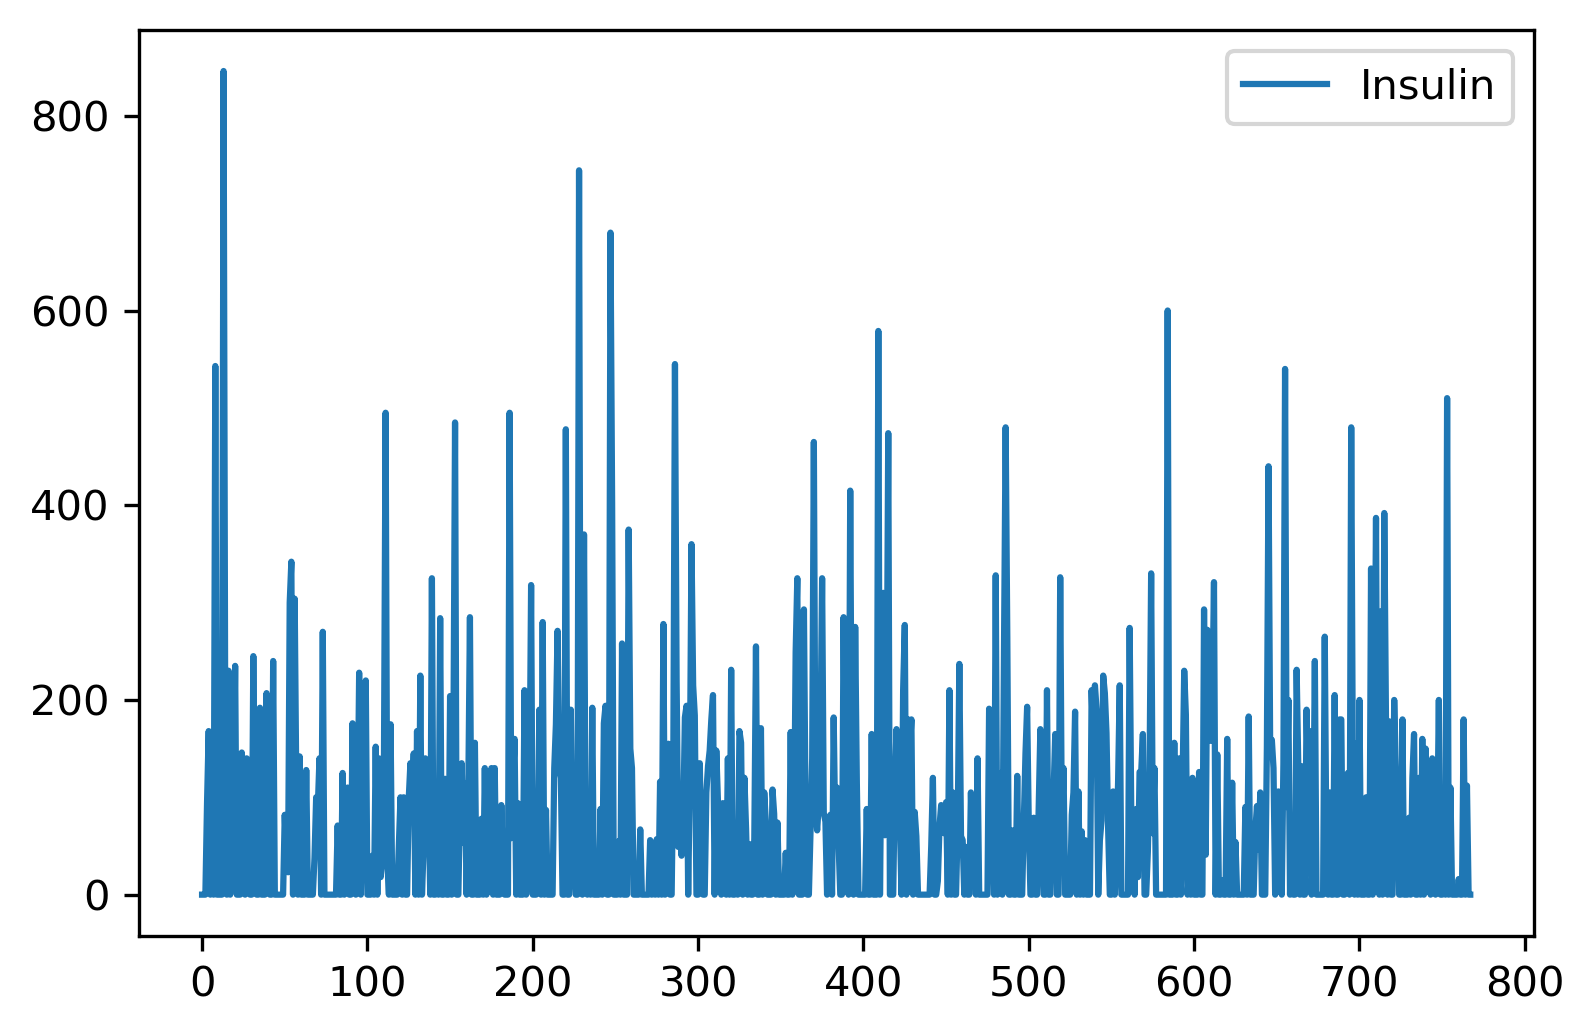

In [60]:
data.loc[:,['Insulin']].plot()

# Supervised Learning

<center> $(x_i, y_i) \propto p(x, y)$ i.i.d.</center>

***

<center>$x_i \in {\rm I\!R^{p}}$</center>

***

<center>$y_i \in {\rm I\!R}$</center>

***

<center>$f(x_i) \approx y_i$</center>

***

<center>$f(x) \approx y$</center>

# Nearest Neighbors

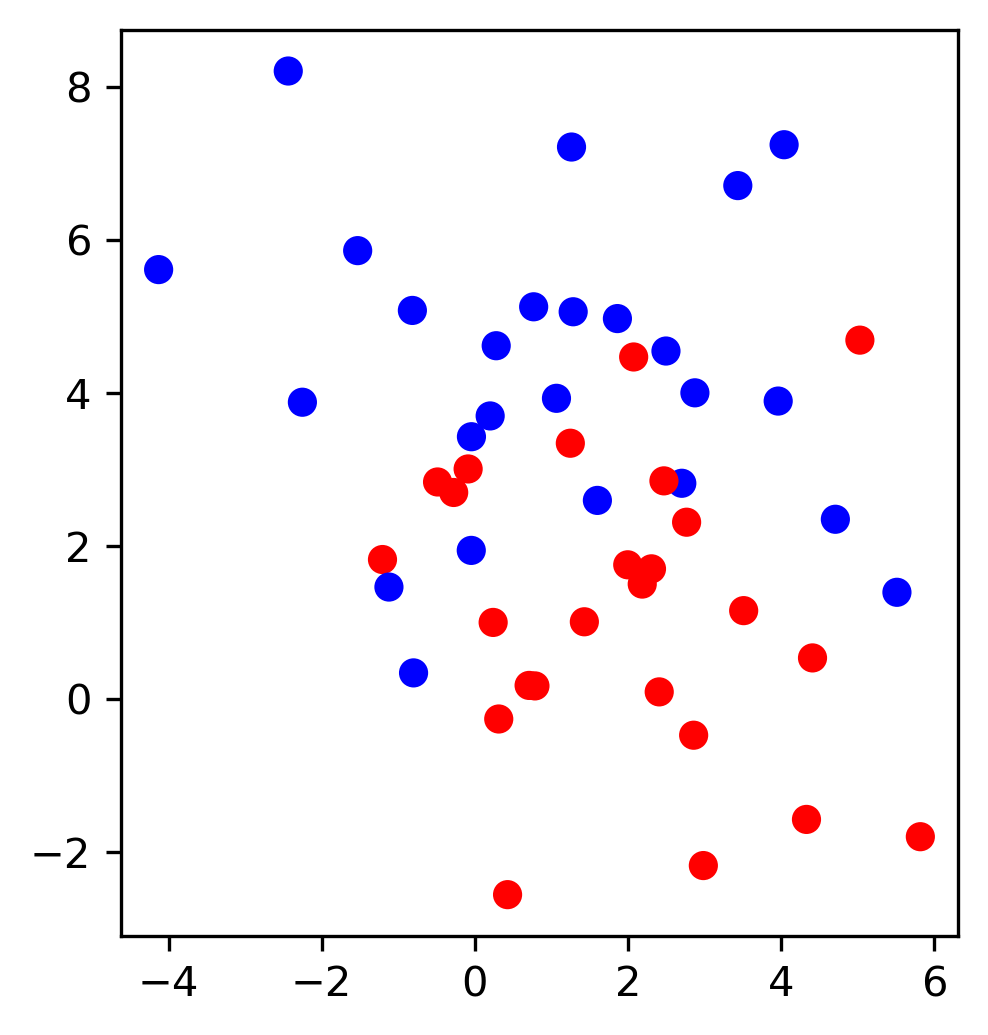

In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "300"

X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)
plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig("img/knn_boundary_dataset.png", bbox_inches='tight')

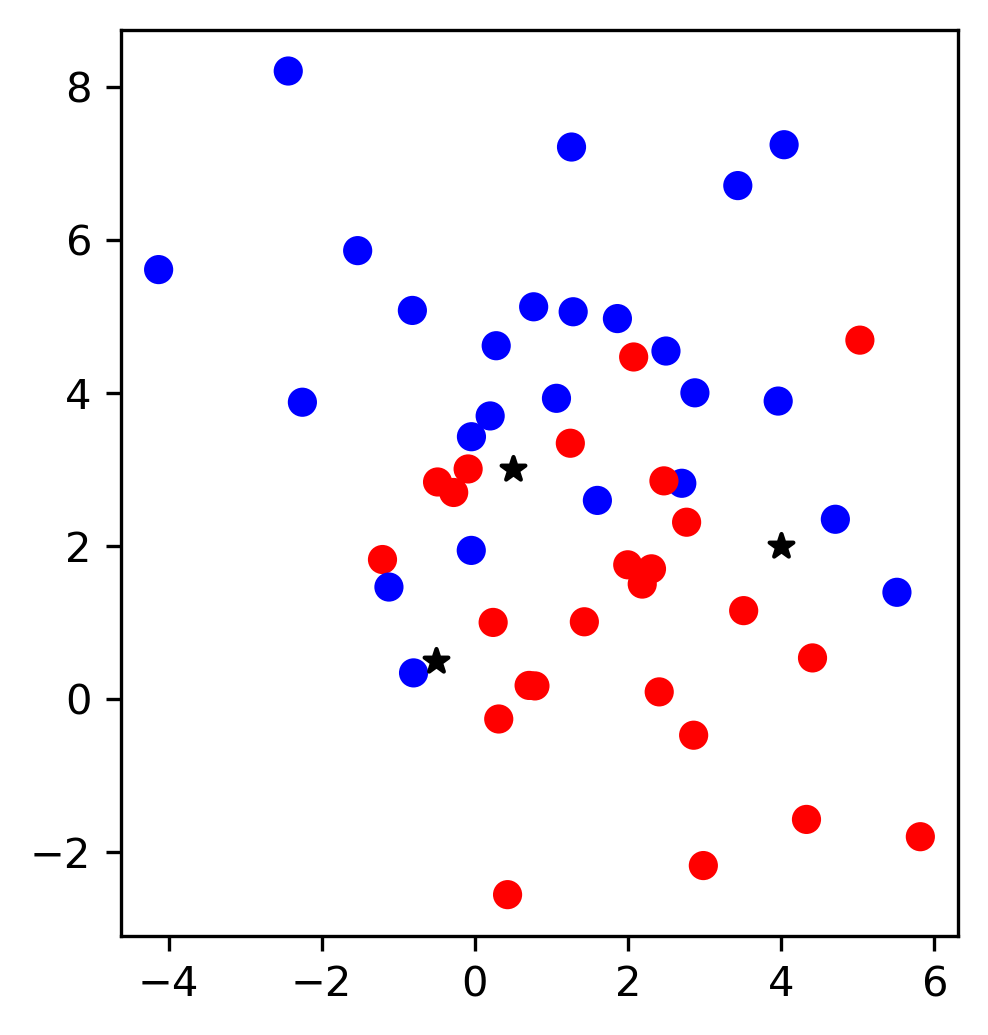

In [4]:
X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])

plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], c='k', marker="*")
plt.savefig("img/knn_boundary_test_points.png", bbox_inches='tight')

<div>
<center>
<img src="img/image-1.jpg" width="500"/>
</div>

<center> $f(x) = y_i, i = argmin_j ||x_j − x||$

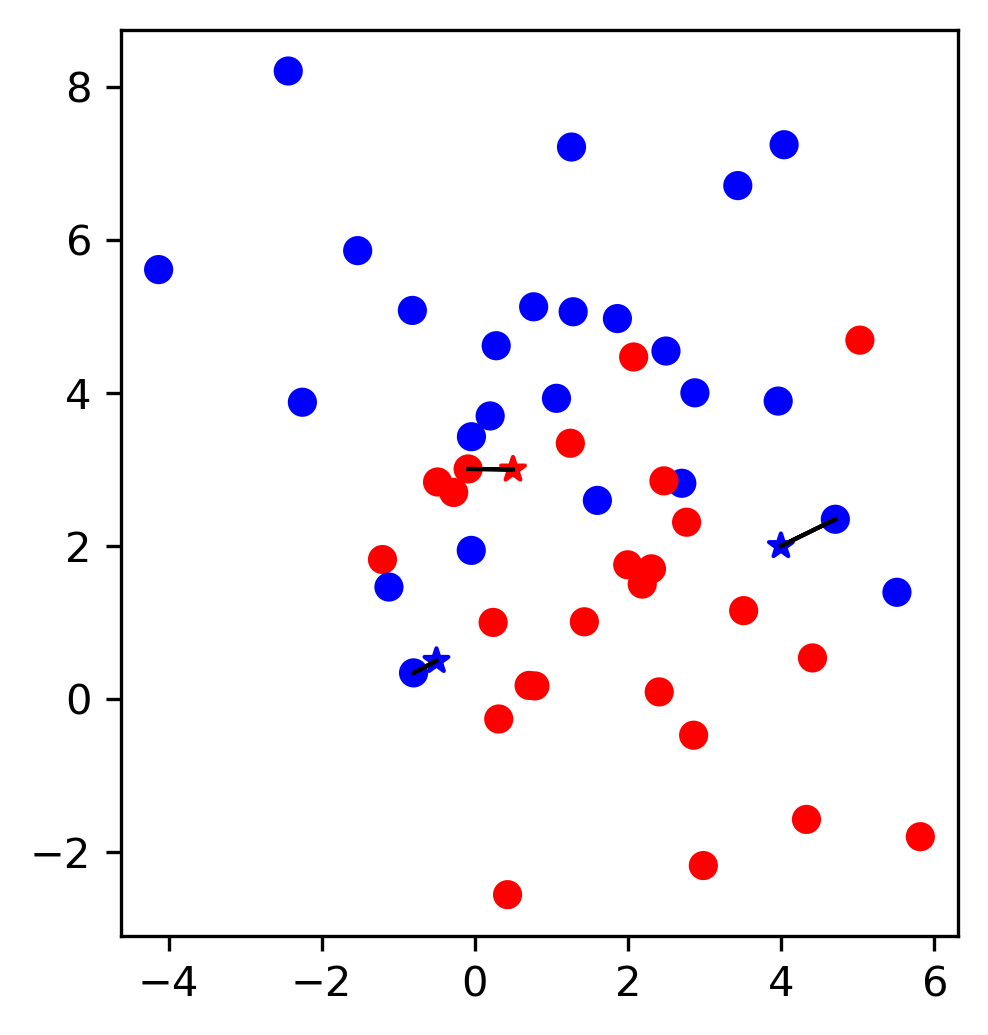

In [5]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

def plot_n_neighbors(X, y, n_neighbors=1):
    X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure()
    plt.gca().set_aspect("equal")
    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                    X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), marker="*")
    training_points = plt.scatter(X[:, 0], X[:, 1], c=y)    
plot_n_neighbors(X, y)
plt.savefig("img/knn_boundary_k1.png", bbox_inches='tight')

<div>
<center>
<img src="img/image-2.jpg" width="500"/>
</div>

<center> $f(x) = y_i, i = argmin_j ||x_j − x||$

<div>
<center>
<img src="img/image-3.jpg" width="500"/>

In [88]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_dummy = np.array([[1.1, 2.2], [6.7, 0.5], [2.4, 9.3], [1.5, 0.0], [0.5, 3.5], [5.1, 9.7], [3.7, 7.8]])
y_dummy = np.array([0, 1, 1, 0, 1, 0, 0])

X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_dummy, test_size=0.25, random_state=45)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)

accuracy: 0.00


In [64]:
# predict_proba
y_pred

array([0, 0])

# Influence of Number of Neighbors

<div>
<center>
<table><tr>
<td><img src="img/image-4.jpg" width="600"/></td>
<td><img src="img/image-5.jpg" width="600"/></td>
</tr></table>


### Quiz
Which of the following option is true about k-NN algorithm?

A) It can be used for classification<br>
B) It can be used for regression<br>
C) It can be used in both classification and regression <br>

Please answer [here](https://PollEv.com/multiple_choice_polls/3YWttRR7qAJ5DqMBuJ1cw/respond).

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.69


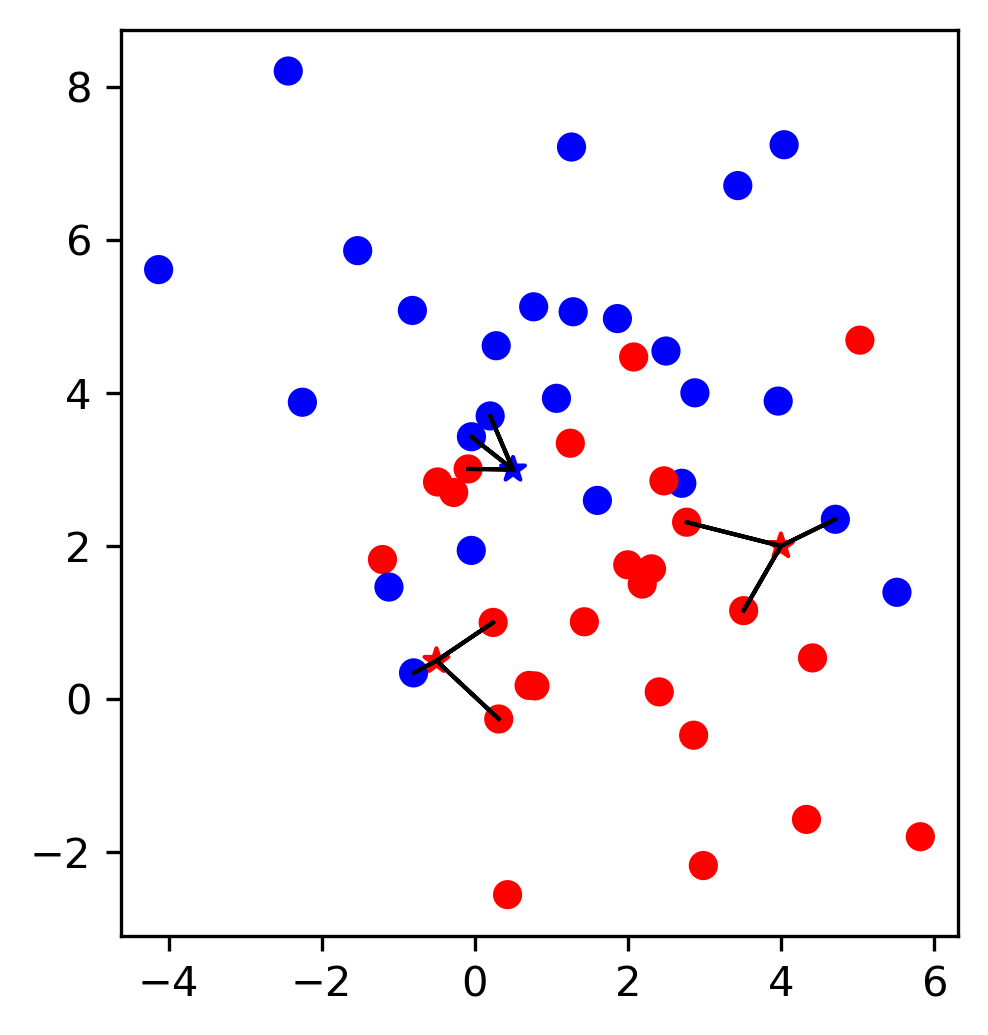

In [9]:
plot_n_neighbors(X, y, n_neighbors=3)
plt.savefig("img/knn_boundary_k3.png", bbox_inches='tight')

### Quiz
k-NN algorithm does more computation on test time rather than train time.

a) True<br>
b) False

Please answer [here](https://PollEv.com/multiple_choice_polls/ThCqGjvFQoTN0BCe7uq7P/respond).

# Influence of n_neighbors

In [10]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):                                       
    # multiclass                                                                                                                 
    if eps is None:
        eps = X.std() / 2.                                                                                                       

    if ax is None:
        ax = plt.gca()                                                                                                           

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps                                                                      
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps                                                                      
    xx = np.linspace(x_min, x_max, 1000)                                                                                         
    yy = np.linspace(y_min, y_max, 1000)                                                                                         

    X1, X2 = np.meshgrid(xx, yy)                                                                                                 
    X_grid = np.c_[X1.ravel(), X2.ravel()]                                                                                       
    decision_values = classifier.predict(X_grid)                                                                                 
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,                                                           
                                                       y_min, y_max),                                                          
            aspect='auto', origin='lower', alpha=alpha)                                                               
    ax.set_xlim(x_min, x_max)                                                                                                    
    ax.set_ylim(y_min, y_max)                                                                                                    
    ax.set_xticks(())                                                                                                            
    ax.set_yticks(())

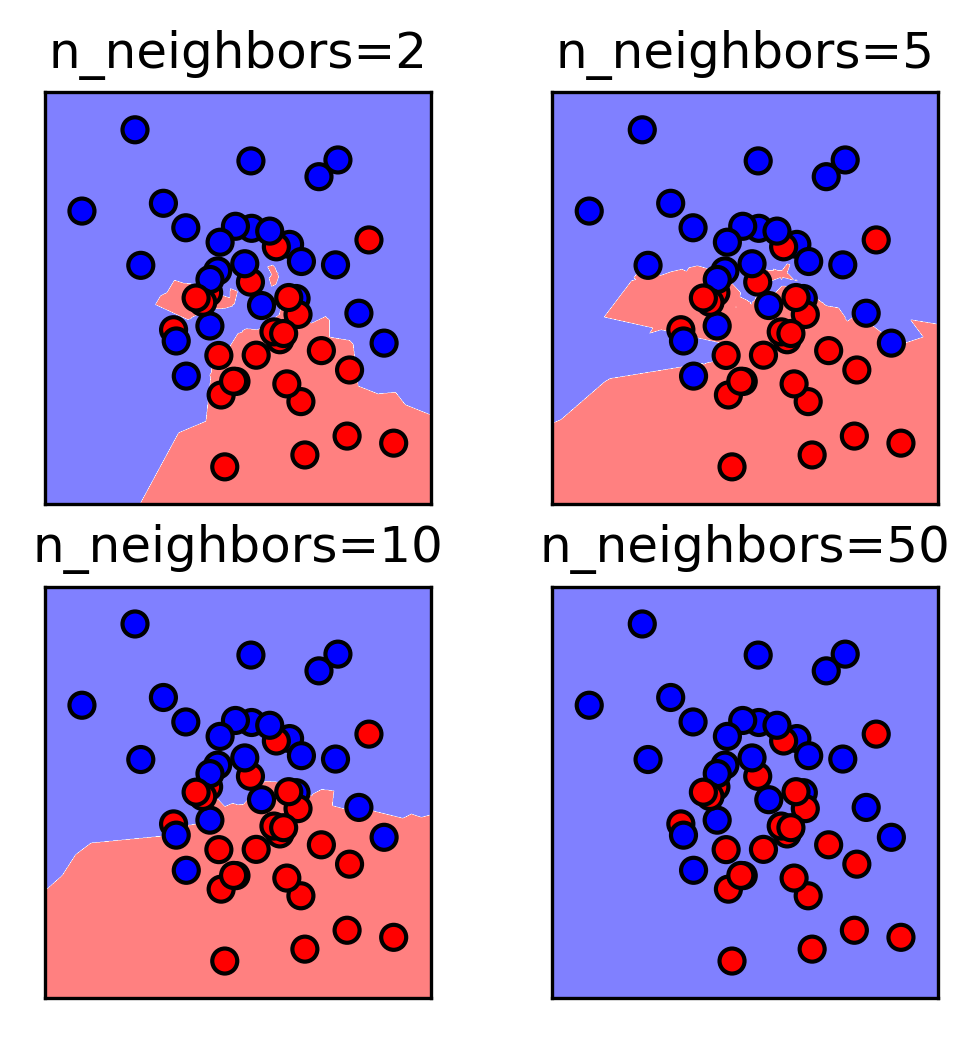

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(4, 4))
for ax, n_neighbors in zip(axes.ravel(), [2, 5, 10, 50]):
    ax.set_title("n_neighbors={}".format(n_neighbors))
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plot_2d_classification(clf, X, ax=ax, alpha=.5)
    ax.set_aspect("equal")

<div>
<center>
<img src="img/image-6.jpg" width="700"/>

# Model complexity

<div>
<center>
<img src="img/image-7.jpg" width="800"/>

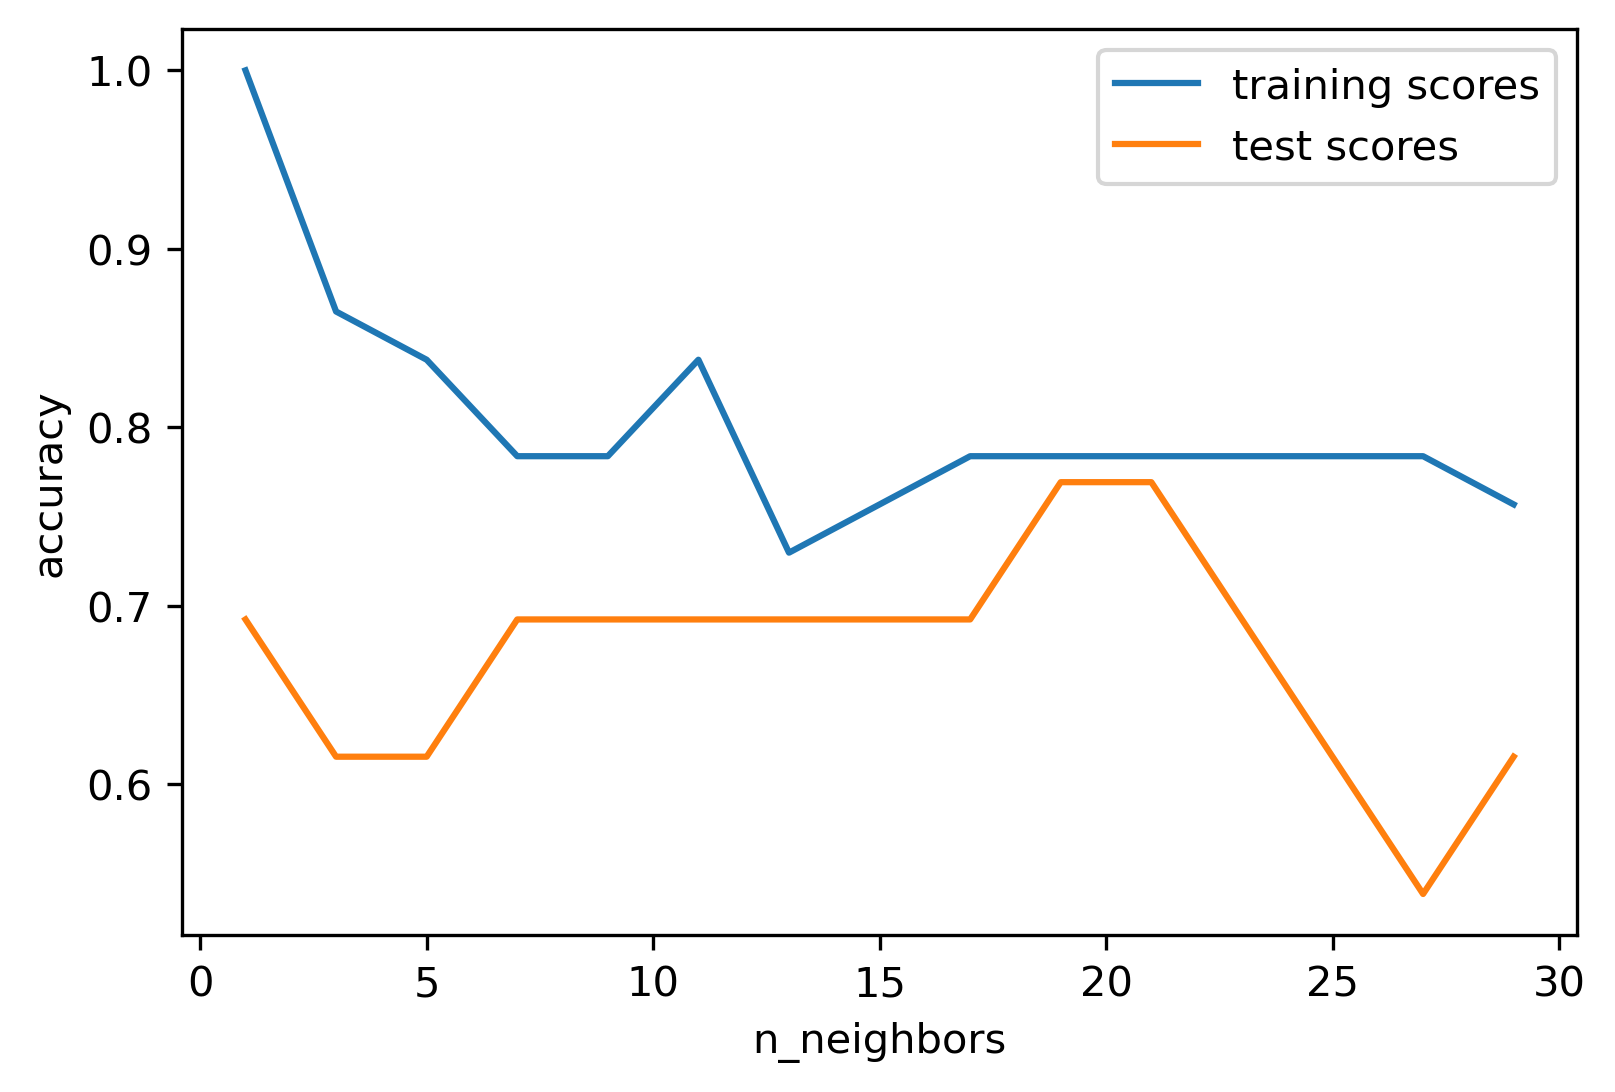

In [12]:
neighbors = range(1, 30, 2)

training_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Overfitting and Underfitting

<div>
<center>
<table><tr>
<td><img src="img/image-8.jpg" width="600"/></td>
<td><img src="img/image-9.jpg" width="600"/></td>
</tr></table>

# Overfitting and Underfitting

<div>
<center>
<img src="img/image-11.jpg" width="800"/>

# Nearest Centroid

<div>
<center>
<img src="img/image-12.jpg" width="500"/>

<center> $f(x) = argmin_{i\in Y} ||\overline{x}_i − x||$

# Nearest Centroid with scikit-learn

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(X_train, y_train)
print("accuracy: {:.2f}".format(nc.score(X_test, y_test)))

accuracy: 0.94


# Parametric and non-parametric models

* Parametric model: Number of “parameters” (degrees of freedom) independent of data.
* Non-parametric model: Degrees of freedom increase with more data.

Pros and cons?

# Nearest neighbor vs. centroid - example

<div>
<center>
<img src="img/image-13.jpg" width="800"/>

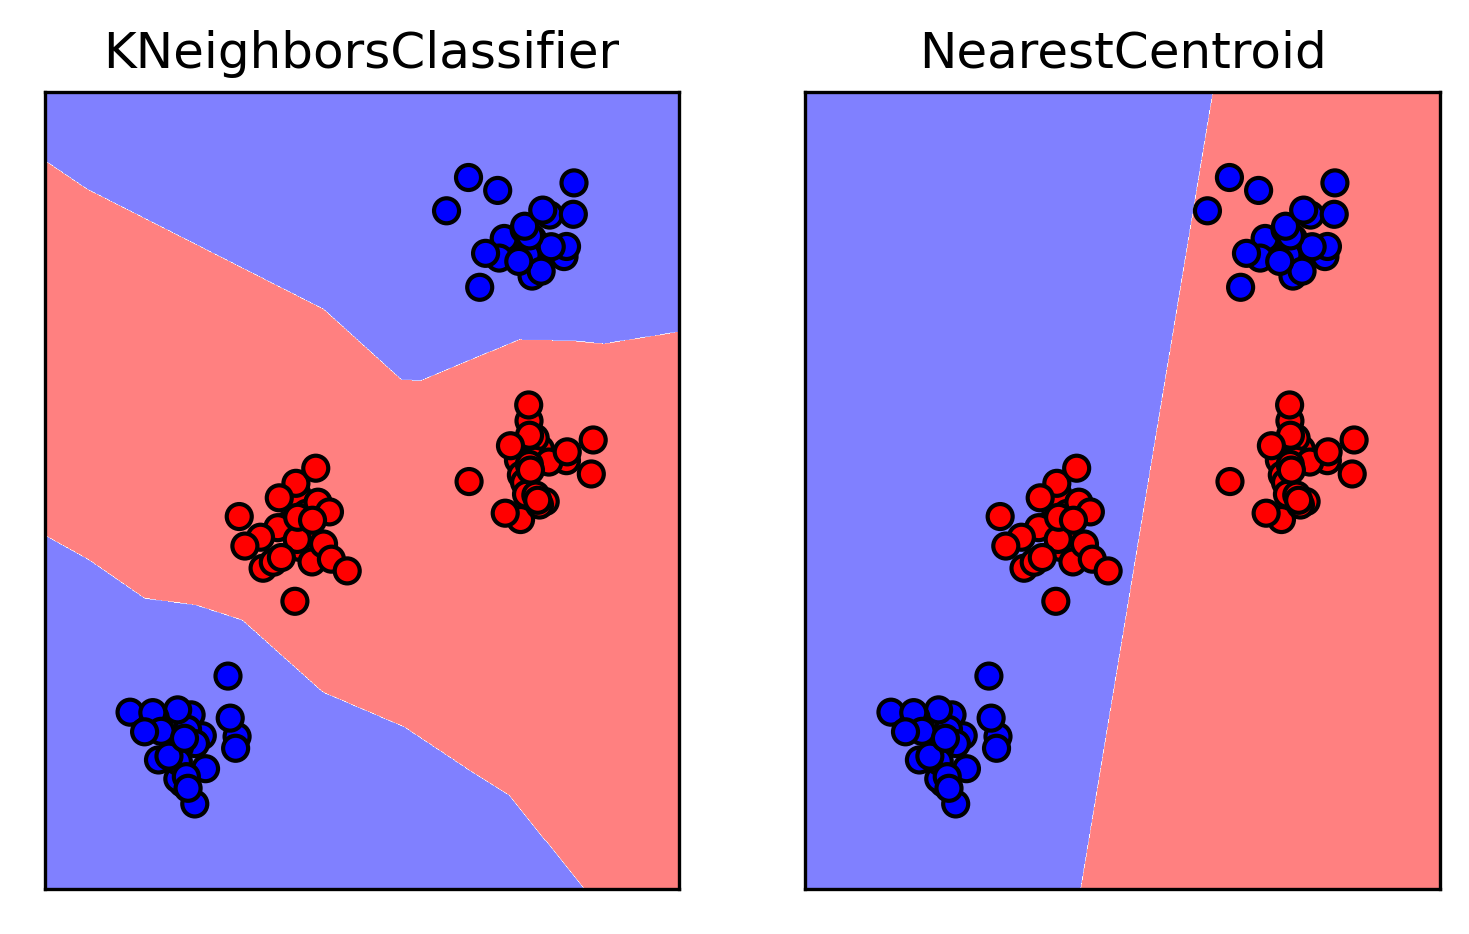

In [14]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)
nc = NearestCentroid().fit(X, y)


plt.figure
fig, axes = plt.subplots(1, 2)
for est, ax in [(knn, axes[0]), (nc, axes[1])]:
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    
    ax.set_title(est.__class__.__name__)
    plot_2d_classification(est, X, alpha=.5, ax=ax)
    ax.set_aspect("equal")

<div>
<center>
<img src="img/image-3.jpg" width="800"/>

In [15]:
from sklearn.datasets import load_breast_cancer
# from sklearn.preprocessing import scale

data = load_breast_cancer()
X, y = data.data, data.target
# X = scale(X)

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

print("Validation: {:.3f}".format(knn.score(X_val, y_val)))
print("Test: {:.3f}".format(knn.score(X_test, y_test)))

Validation: 0.935
Test: 0.972


In [16]:
val = []
test = []

for i in range(1000):
    rng = np.random.RandomState(i)
    noise = rng.normal(scale=.1, size=X_train.shape)
    knn = KNeighborsClassifier(n_neighbors=5).fit(X_train + noise, y_train)
    val.append(knn.score(X_val, y_val))
    test.append(knn.score(X_test, y_test))

print("Validation: {:.3f}".format(np.max(val)))
print("Test: {:.3f}".format(test[np.argmax(val)]))


Validation: 0.963
Test: 0.972


# Threefold split

<div>
<center>
<img src="img/image-14.jpg" width="1500"/>

    
* **Advantages**: fast and simple
    
* **Disadvantages**: high variance and bad use of data

# Threefold Split for Hyper-Parameters (e.g. K in kNN)

In [17]:
from sklearn.model_selection import cross_val_score
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

val_scores = []
neighbors = np.arange(1, 15, 2)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
    
print("best validation score: {:.3f}".format(np.max(val_scores)))
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors:", best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best validation score: 0.972
best n_neighbors: 7
test-set score: 0.979


# Cross-validation

<div>
<center>
<img src="img/image-15.jpg" width="1800"/>

* **Advantages**: more stable \& more data
    
* **Disadvantages**: slower

# Cross-validation + test set

<div>
<center>
<img src="img/image-16.jpg" width="900"/>

# Parameters optimization using Cross-Validation (CV)

In [18]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)
cross_val_scores = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    cross_val_scores.append(np.mean(scores))
    
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors:", best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))


best cross-validation score: 0.958
best n_neighbors: 3
test-set score: 0.972


# Conceptual overview

<div>
<center>
<img src="img/image-17.jpg" width="900"/>

# GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)

param_grid_knn = {'n_neighbors': np.arange(1, 15, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn,
                    cv=5, return_train_score=True)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: 0.965
best parameters: {'n_neighbors': 3}
test-set score: 0.965


In [49]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001606,0.000523,0.002594,0.000560,1,{'n_neighbors': 1},0.953488,0.976744,0.953488,0.976744,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001329,0.000421,0.002956,0.000568,3,{'n_neighbors': 3},1.000000,0.976744,0.976744,0.930233,...,0.976501,0.981723,0.976501,0.976501,0.981771,0.976562,0.973958,0.976562,0.978092,0.002651
2,0.001646,0.000444,0.002763,0.000877,5,{'n_neighbors': 5},1.000000,0.976744,0.976744,0.906977,...,0.968668,0.971279,0.971279,0.963446,0.971354,0.968750,0.963542,0.968750,0.968180,0.002808
3,0.001809,0.000411,0.002496,0.000505,7,{'n_neighbors': 7},1.000000,0.976744,0.976744,0.930233,...,0.968668,0.973890,0.971279,0.960836,0.973958,0.966146,0.968750,0.968750,0.968700,0.003696
4,0.001404,0.000495,0.002752,0.000497,9,{'n_neighbors': 9},1.000000,0.976744,0.976744,0.906977,...,0.971279,0.968668,0.971279,0.963446,0.973958,0.963542,0.966146,0.973958,0.968439,0.003953
5,0.001523,0.000732,0.002929,0.000325,11,{'n_neighbors': 11},1.000000,0.976744,0.976744,0.906977,...,0.971279,0.973890,0.966057,0.963446,0.968750,0.963542,0.963542,0.971354,0.967659,0.003530
6,0.001807,0.000396,0.002705,0.000463,13,{'n_neighbors': 13},1.000000,0.976744,0.976744,0.906977,...,0.971279,0.971279,0.968668,0.960836,0.963542,0.958333,0.963542,0.973958,0.966616,0.004765


# n_neighbors Search Results

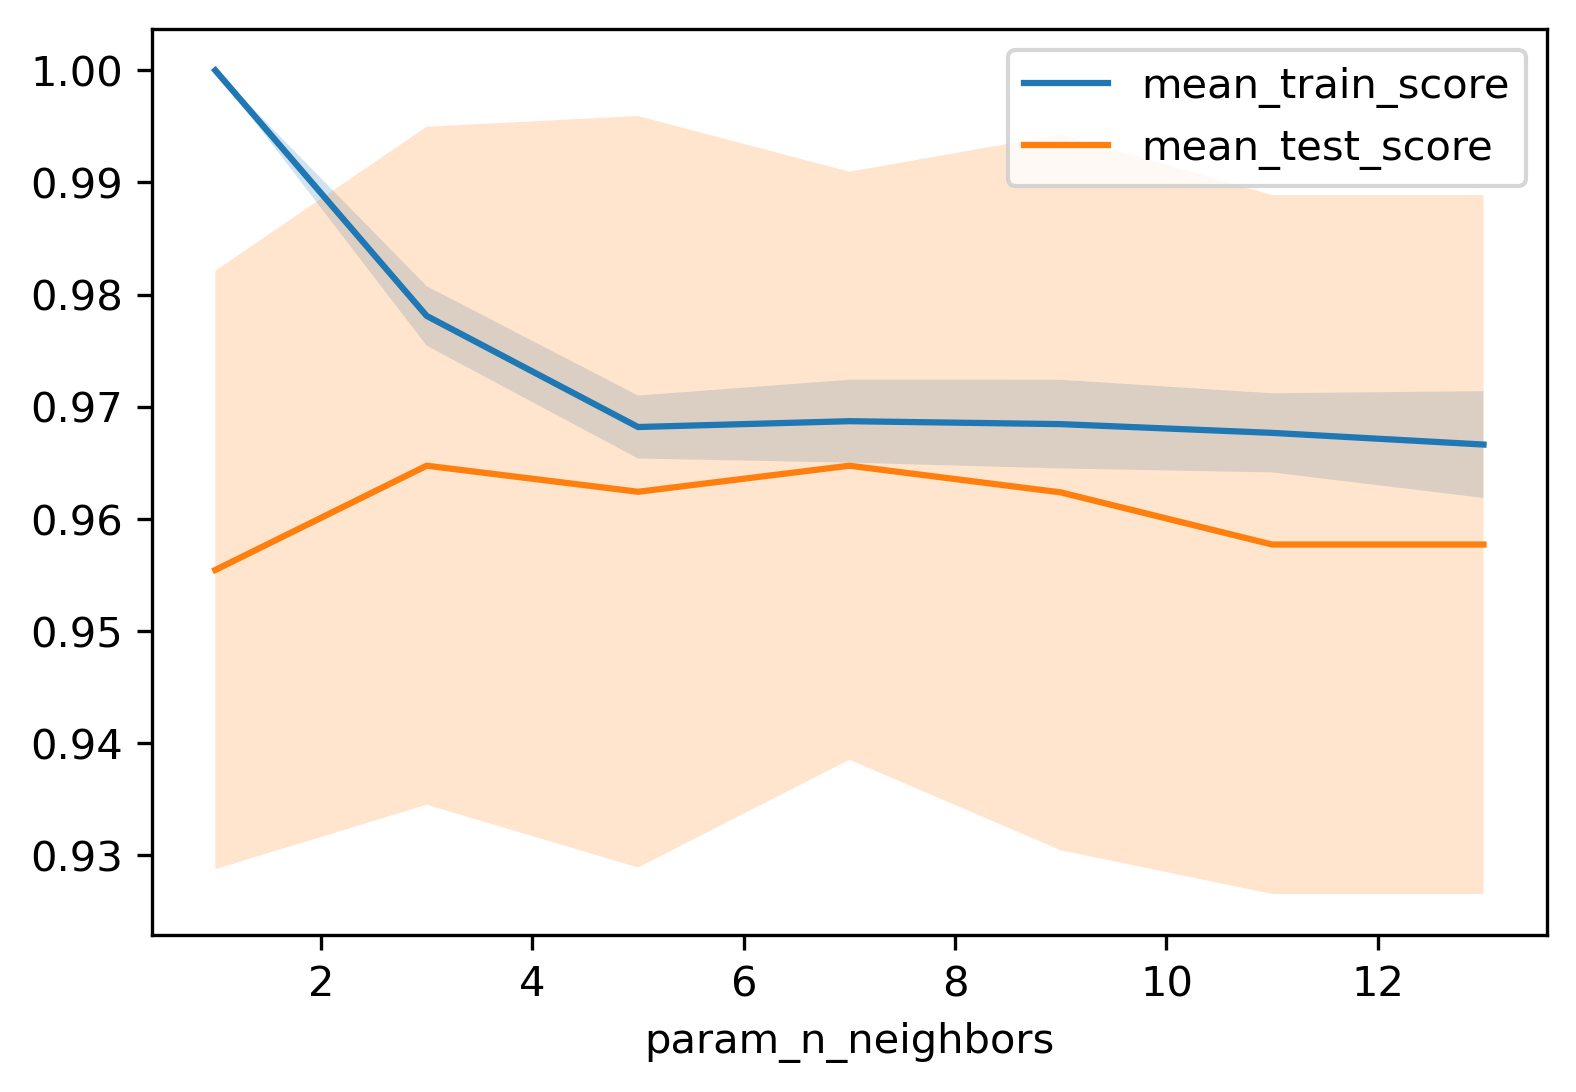

In [51]:
results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

<div>
<center>
<img src="img/image-19.jpg" width="900"/>

<font size="25"><center>Cross-Validation Strategies

# StratifiedKFold / StratifiedShuffleSplit

Stratified: Ensure relative class frequencies in each fold refect relative class frequencies on the whole dataset.

<div>
<center>
<img src="img/image-20.jpg" width="1400"/>

# Defaults in scikit-learn

* 5-fold in 0.22 version
* For classification cross-validation is stratiffied
* train_test_split has stratify option: train_test_split(X, y, stratify=y)
* No shuffle by default!

# Repeated KFold and LeaveOneOut

* **LeaveOneOut:** KFold(n_folds=n_samples) High variance, takes a long time
* **Better:** RepeatedKFold. Apply KFold or StratifiedKFold multiple times with shuffled data. Reduces variance!

# ShuffleSplit

<div>
<center>
<img src="img/image-21.jpg" width="1800"/>

# TimeSeriesSplit

<div>
<center>
<img src="img/image-22.jpg" width="1800"/>

# Cross-Validation Generators (Implementations)

In [21]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)
rs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

print("KFold:")
print(cross_val_score(KNeighborsClassifier(), X, y, cv=kfold))

print("StratifiedKFold:")
print(cross_val_score(KNeighborsClassifier(), X, y, cv=skfold))

print("ShuffleSplit:")
print(cross_val_score(KNeighborsClassifier(), X, y, cv=ss))

print("RepeatedStratifiedKFold:")
print(cross_val_score(KNeighborsClassifier(), X, y, cv=rs))

KFold:
[0.92982456 0.95614035 0.96491228 0.98245614 0.96460177]
StratifiedKFold:
[0.97368421 0.97368421 0.96491228 0.94736842 0.96460177]
ShuffleSplit:
[0.94736842 0.97076023 0.95321637 0.96491228 0.95321637 0.95321637
 0.95906433 0.95906433 0.97076023 0.96491228 0.93567251 0.95321637
 0.96491228 0.94152047 0.97076023 0.92982456 0.94736842 0.96491228
 0.97660819 0.9122807 ]
RepeatedStratifiedKFold:
[0.96491228 0.98245614 0.97368421 0.96491228 0.92035398 0.95614035
 0.98245614 0.96491228 0.96491228 0.96460177 0.94736842 0.96491228
 0.98245614 0.95614035 0.99115044 0.97368421 0.97368421 0.97368421
 0.96491228 0.95575221 0.97368421 0.92982456 0.96491228 0.98245614
 0.97345133 0.95614035 0.95614035 0.97368421 1.         0.94690265
 0.95614035 0.97368421 0.98245614 0.95614035 0.95575221 0.96491228
 0.95614035 0.95614035 0.98245614 0.97345133 0.97368421 0.96491228
 0.96491228 0.99122807 0.92920354 0.95614035 0.96491228 0.98245614
 0.96491228 0.96460177]


# cross_validate function

In [22]:
from sklearn.model_selection import cross_validate
res = cross_validate(KNeighborsClassifier(), X, y, return_train_score=True,
                     cv=5, scoring=["accuracy", "roc_auc"])
res_df = pd.DataFrame(res)

In [23]:
res_df

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
0,0.002051,0.013278,0.964912,0.980220,0.996561,0.997662
1,0.001998,0.008001,0.956140,0.973626,0.983623,0.998614
2,0.002004,0.009127,0.982456,0.971429,0.999173,0.997131
3,0.001999,0.009000,0.956140,0.978022,0.983631,0.997730
4,0.003043,0.013969,0.964602,0.978070,0.994634,0.998026


### Quiz - Cross Validation
Which of the following statements are true regarding K-fold CV?

1 - Increase in K will result in higher time required to cross validate the result.<br>
2 - Higher values of K will result in higher confidence on the cross-validation result as compared to lower value of K.<br>
3 - If K=N, then it is called Leave one out cross validation, where N is the number of observations. <br>

A) 1 and 2<br>
B) 2 and 3<br>
C) 1 and 3<br>
D) 1,2 and 3<br>

Please answer [here](https://PollEv.com/multiple_choice_polls/QDjnqxvJerg653MrJxcV4/respond).

<font size="25"><center>Thank you!